In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns

In [35]:
df = pd.read_table("fruit.txt")

In [36]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [38]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [39]:
df.head(20)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [40]:
df.groupby("fruit_name").size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [41]:
df["fruit_name"].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [42]:
for i in df.fruit_name:
    print(i)

apple
apple
apple
mandarin
mandarin
mandarin
mandarin
mandarin
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon
lemon


In [43]:
lbl = preprocessing.LabelEncoder()
df["fruit_name"] = lbl.fit_transform(df["fruit_name"])
df["fruit_subtype"] = lbl.fit_transform(df["fruit_subtype"])
X= df[["color_score","height","width","mass"]]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y=df["fruit_name"]

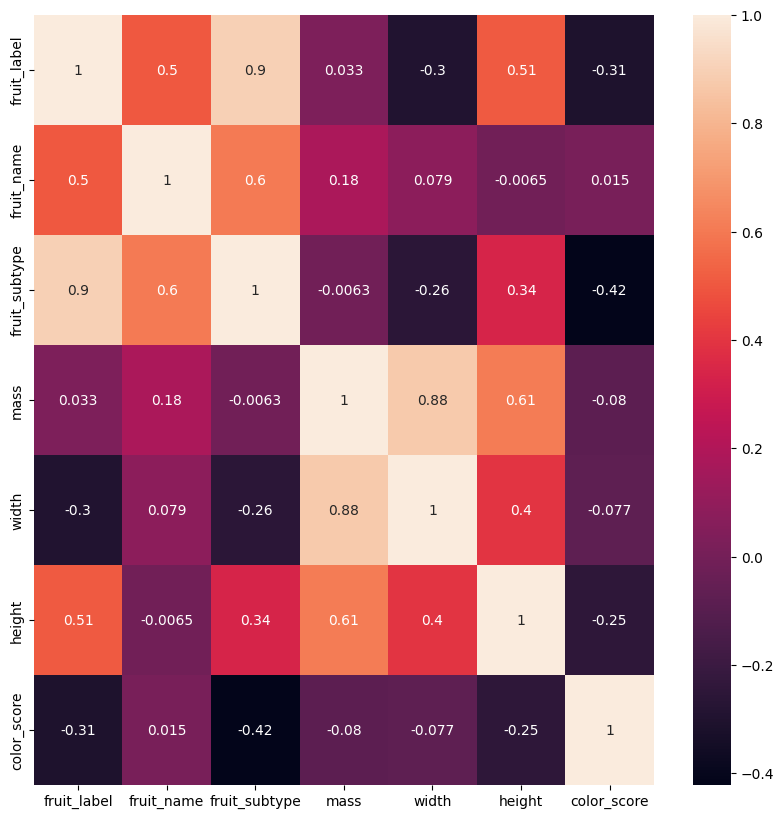

In [44]:
plt.close()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True)
plt.show()


In [45]:
df.fruit_name

0     0
1     0
2     0
3     2
4     2
5     2
6     2
7     2
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
Name: fruit_name, dtype: int32

In [46]:
df.fruit_label

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train , y_train)

LogisticRegression()

In [50]:
model.score(X_train,y_train)

0.723404255319149

In [51]:
out=model.predict(X_test)

In [52]:
out

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [53]:
y_test

9     0
39    3
40    3
21    0
24    3
28    3
29    3
48    1
55    1
25    3
31    3
50    1
Name: fruit_name, dtype: int32

In [54]:
model.score(X_test,y_test)

0.4166666666666667

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model2 = DecisionTreeClassifier()

In [57]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
model2.score(X_train,y_train)

1.0

In [59]:
model2.predict(X_test)

array([0, 3, 3, 0, 3, 0, 3, 1, 1, 3, 3, 1])

In [60]:
y_test

9     0
39    3
40    3
21    0
24    3
28    3
29    3
48    1
55    1
25    3
31    3
50    1
Name: fruit_name, dtype: int32

In [61]:
model2.score(X_test,y_test)

0.9166666666666666

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model3 = KNeighborsClassifier()

In [64]:
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
model3.score(X_train,y_train)

1.0

In [66]:
model3.predict(X_test)

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 0, 1])

In [67]:
model3.score(X_test,y_test)

0.9166666666666666